<a href="https://colab.research.google.com/github/VAIBHAV-CHOPRA39/First/blob/master/Week0_1_Data_Preprocesing_%26_Audio_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Set Up the Environment**

In [21]:
!pip install pandas numpy matplotlib librosa

In [40]:
# Import libraries for file handling, data processing, and audio analysis
import os  # To work with file paths and directories
import pandas as pd  # For data handling and creating CSV files
import numpy as np  # For numerical computations
import librosa  # For audio feature extraction
import librosa.display  # For audio visualizations
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For label encoding and feature scaling

# **Step 2: Load and Explore the Dataset**

In [15]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [18]:
!kaggle datasets download andradaolteanu/gtzan-dataset-music-genre-classification
!unzip gtzan-dataset-music-genre-classification.zip

Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
100% 1.21G/1.21G [00:37<00:00, 41.9MB/s]
100% 1.21G/1.21G [00:37<00:00, 34.5MB/s]
Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_or

## **Exploration**

In [32]:
zip_path = '/content/gtzan-dataset-music-genre-classification.zip'
unzip_dir = '/content/gtzan-dataset-music-genre-classification'  # Directory to extract files to
# Unzip the archive
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# Verify the extracted files
extracted_files = os.listdir(unzip_dir)
print(extracted_files)


['Data']


In [33]:
df_feature30sec=pd.read_csv('/content/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv')
df_feature3sec=pd.read_csv('/content/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv')

In [39]:
df_feature30sec.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [37]:
df_feature3sec.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [41]:
# Path to the dataset (audio files organized by genre folders)
dataset_path = "/content/gtzan-dataset-music-genre-classification/Data/genres_original"
# Path to save the processed features CSV
output_csv_path = "/content/processed_features.csv"


In [42]:
# Lists to store features (X) and corresponding labels (y)
features_list = []  # Each row will hold audio features
labels_list = []  # Each row will hold the genre label (target)


In [43]:
def extract_features(audio_file, label):
    """
    Extract features from an audio file.

    Parameters:
    - audio_file: The path to the audio file.
    - label: The genre label of the audio file.

    Stores:
    - Audio features in features_list
    - Corresponding label in labels_list
    """
    try:
        # Load audio (30 seconds max) using librosa
        y, sr = librosa.load(audio_file, duration=30)

        # Extract various audio features
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr).mean()  # Chromagram
        rms = librosa.feature.rms(y=y).mean()  # Root mean square energy
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()  # Spectral centroid
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()  # Bandwidth
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()  # Spectral rolloff
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y).mean()  # Zero crossing rate

        # Extract 20 MFCCs and calculate their mean and variance
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        mfcc_mean = mfcc.mean(axis=1)  # Mean of each coefficient
        mfcc_var = mfcc.var(axis=1)  # Variance of each coefficient

        # Combine all features into a single list
        features = [
            chroma_stft, rms, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate
        ] + list(mfcc_mean) + list(mfcc_var)

        # Append features and label to the respective lists
        features_list.append(features)
        labels_list.append(label)

    except Exception as e:
        # Log an error if any file cannot be processed
        print(f"Error processing {audio_file}: {e}")


In [44]:
# Process each audio file in the dataset
for genre_folder in os.listdir(dataset_path):  # Each folder represents a genre
    genre_folder_path = os.path.join(dataset_path, genre_folder)  # Full path to the genre folder

    if os.path.isdir(genre_folder_path):  # Ensure it's a directory
        for file in os.listdir(genre_folder_path):  # Process each file in the genre folder
            file_path = os.path.join(genre_folder_path, file)  # Full path to the file

            if file_path.endswith(".wav"):  # Process only WAV files
                extract_features(file_path, genre_folder)  # Extract features and label


<ipython-input-43-ee17b96c0eac>:15: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing /content/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00054.wav: 


In [45]:
# Define column names for the extracted features
columns = [
    "chroma_stft", "rms", "spectral_centroid", "spectral_bandwidth", "rolloff", "zero_crossing_rate"
] + [f"mfcc{i}_mean" for i in range(1, 21)] + [f"mfcc{i}_var" for i in range(1, 21)]

# Create a DataFrame with features and corresponding labels
data = pd.DataFrame(features_list, columns=columns)
data["label"] = labels_list  # Add the labels as the last column


In [46]:
# Encode genre labels as numerical values
label_encoder = LabelEncoder()
data["label"] = label_encoder.fit_transform(data["label"])  # Transform genres into integers

# Save label mappings for reference
label_mappings = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mappings:", label_mappings)  # Print genre-to-integer mapping


Label Mappings: {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


In [47]:
# Standardize the feature columns (mean = 0, std = 1) for consistent scale
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data.iloc[:, :-1])  # Scale all columns except the label

# Create a new DataFrame with standardized features and label
data_scaled = pd.DataFrame(features_scaled, columns=columns)
data_scaled["label"] = data["label"]  # Add back the label column


In [48]:
# Save the processed data as a CSV file for future use
data_scaled.to_csv(output_csv_path, index=False)
print(f"Processed data saved to {output_csv_path}")


Processed data saved to /content/processed_features.csv


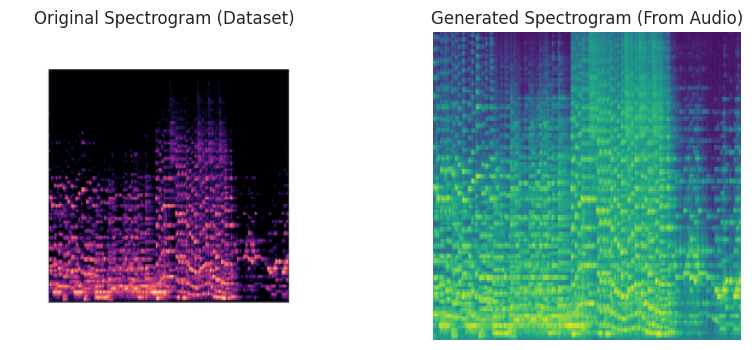

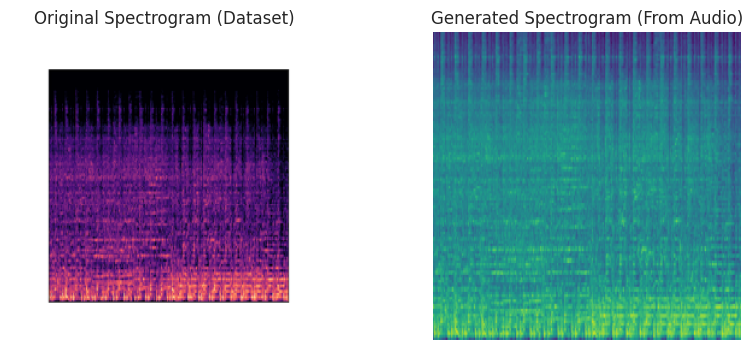

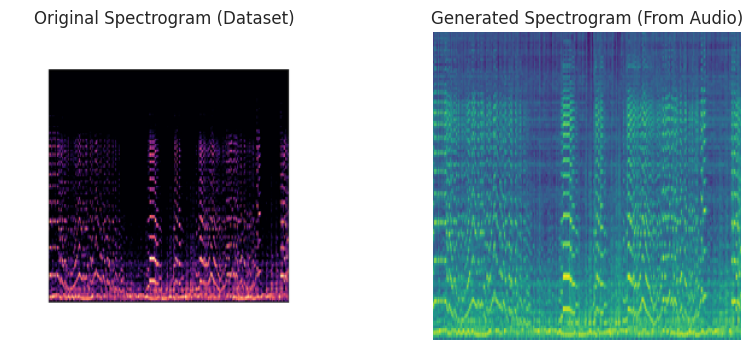

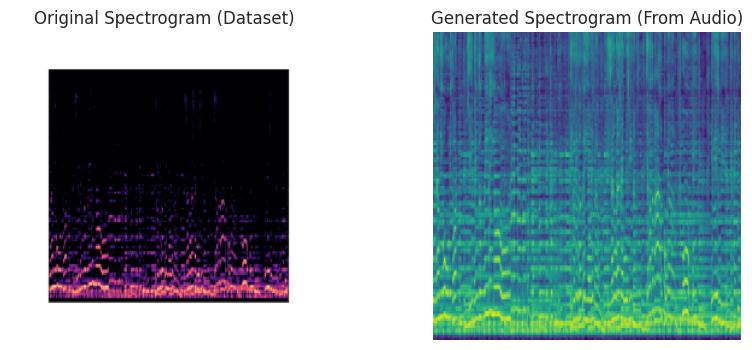

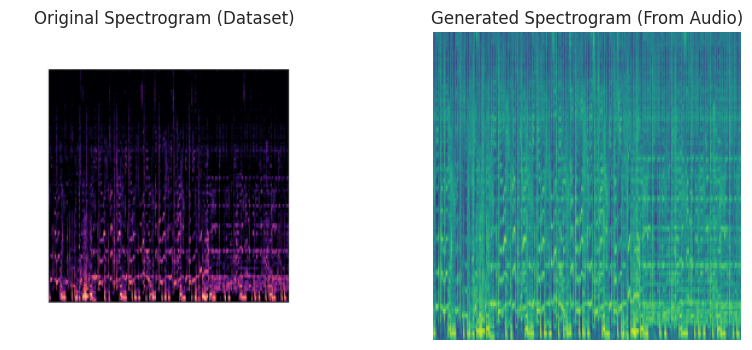

KeyboardInterrupt: 

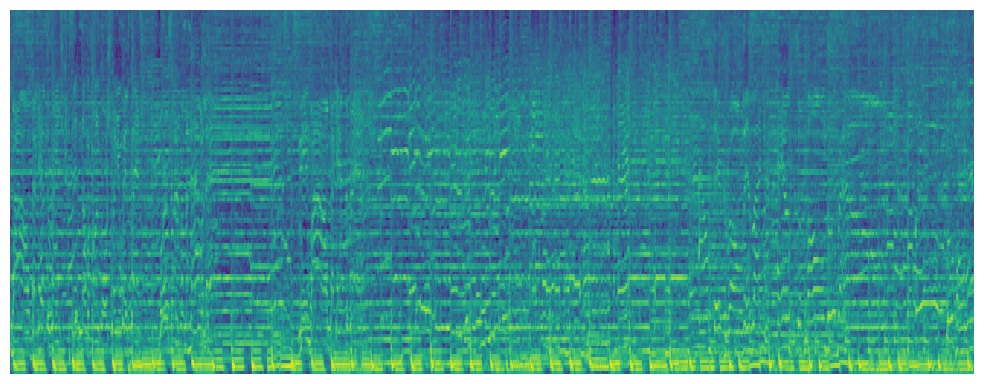

In [64]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from PIL import Image
import os

# Paths for the original images and audio files
images_folder = "/content/gtzan-dataset-music-genre-classification/Data/images_original"
audio_folder = "/content/gtzan-dataset-music-genre-classification/Data/genres_original"

# Function to generate spectrogram from audio
def generate_spectrogram(audio_file, output_path="generated_spectrogram.png"):
    # Load audio file
    y, sr = librosa.load(audio_file, sr=None)
    plt.figure(figsize=(10,4))  # Increase figure size for clarity

    # Generate Mel spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max),
                             sr=sr, fmax=8000, cmap='viridis')  # Use a clearer color map

    # Save spectrogram image
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(output_path, bbox_inches="tight", pad_inches=0)  # High DPI for better quality
    plt.close()
    return output_path

# Function to display images side by side
def display_images(original_image_path, generated_image_path):
    # Load images
    original_img = Image.open(original_image_path)
    generated_img = Image.open(generated_image_path)

    # Resize images for uniformity
    target_size = (256, 256)
    original_img = original_img.resize(target_size)
    generated_img = generated_img.resize(target_size)

    # Plot both images side by side
    plt.figure(figsize=(10, 4))  # Wider figure for better visualization

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Original Spectrogram (Dataset)")
    plt.axis("off")

    # Generated image
    plt.subplot(1, 2, 2)
    plt.imshow(generated_img)
    plt.title("Generated Spectrogram (From Audio)")
    plt.axis("off")

    plt.show()

# Iterate through genres and file IDs for top 2 files
genres = os.listdir(images_folder)  # List of all genres

for genre in genres:
    genre_audio_folder = os.path.join(audio_folder, genre)
    genre_image_folder = os.path.join(images_folder, genre)

    # Get the first two files in the genre folder
    file_ids = [f.split('.')[1] for f in os.listdir(genre_audio_folder)[:2]]  # First 2 file IDs in the genre

    for file_id in file_ids:
        audio_file = os.path.join(genre_audio_folder, f"{genre}.{file_id}.wav")
        original_image_path = os.path.join(genre_image_folder, f"{genre}{file_id}.png")

        # Generate and save the spectrogram from audio
        generated_image_path = generate_spectrogram(audio_file)

        # Display the images
        display_images(original_image_path, generated_image_path)
        break


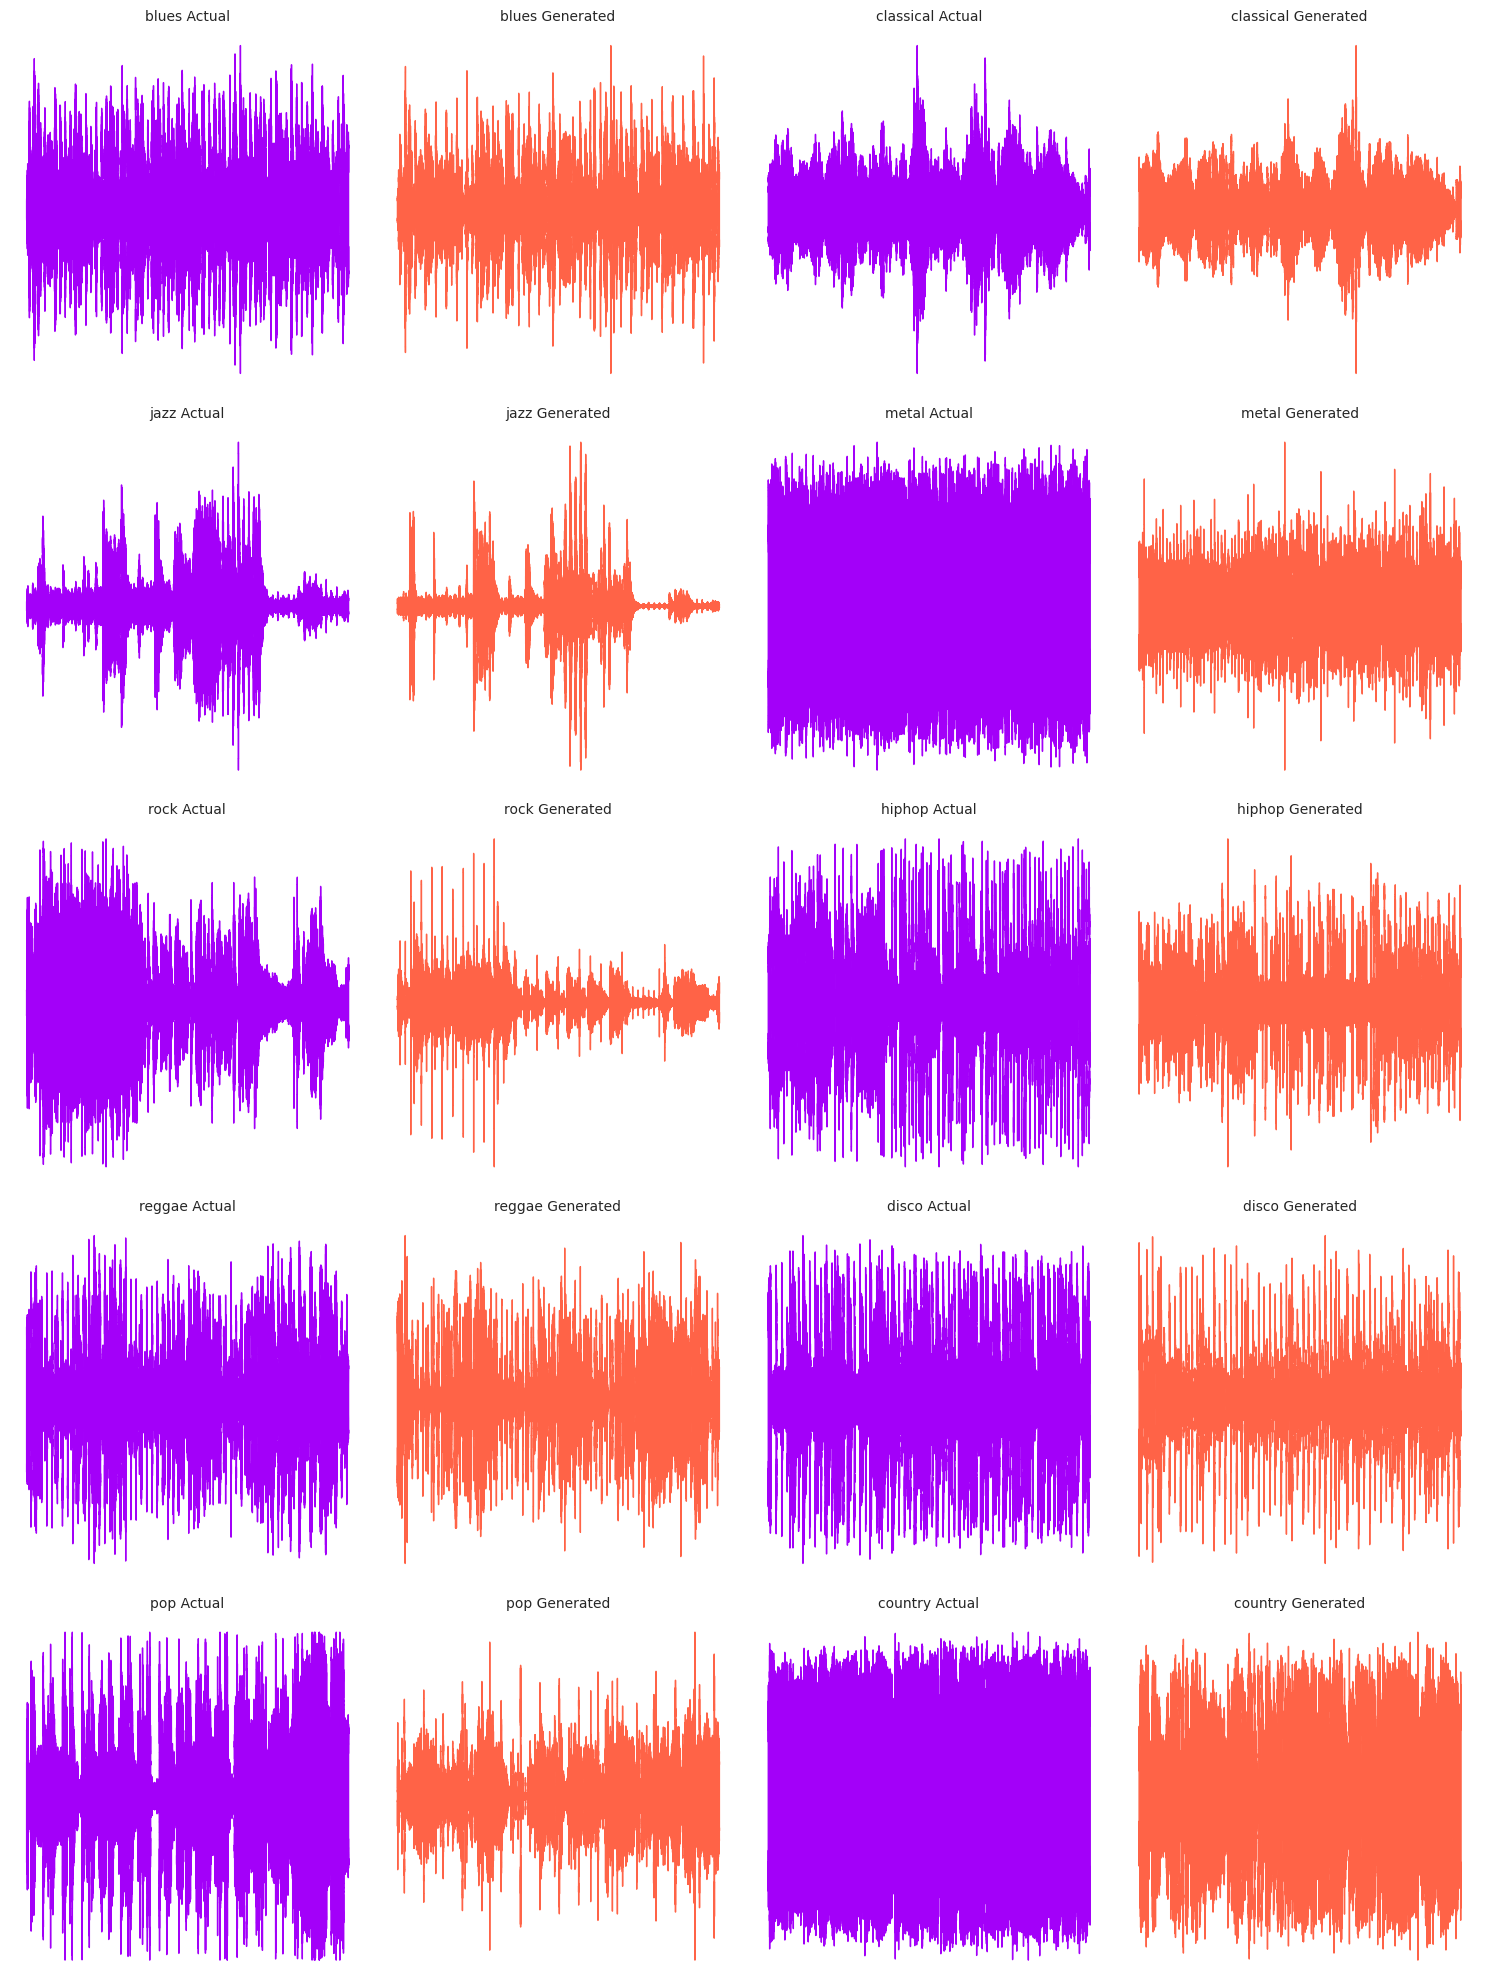

In [69]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from PIL import Image
import os

# Paths for the audio files
path_audio_files = "/content/gtzan-dataset-music-genre-classification/Data/genres_original/"

# Define the genres
genre_dict = {
    "blues": 1, "classical": 1, "jazz": 1, "metal": 1, "rock": 1,
    "hiphop": 1, "reggae": 1, "disco": 1, "pop": 1, "country": 1
}

def generate_transformed_waveform(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    transformed_waveform = librosa.effects.preemphasis(y)
    return transformed_waveform, sr

# Calculate dimensions
num_genres = len(genre_dict)
num_rows = 5  # Fixed number of rows
num_cols = 4  # Fixed number of columns for 2 genres per row (2 waveforms each)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))

# Plot counter
plot_count = 0

# Loop through genres
for genre in genre_dict.keys():
    # Calculate current row and column
    current_row = plot_count // 4
    current_col = plot_count % 4

    # Read audio file
    audio_file = os.path.join(path_audio_files, genre, f"{genre}.00000.wav")

    # Load waveforms
    data, sampling_rate = librosa.load(audio_file, sr=None)
    generated_data, sr_transformed = generate_transformed_waveform(audio_file)

    # Plot actual waveform
    librosa.display.waveshow(y=data, sr=sampling_rate, color="#A300F9",
                           ax=axes[current_row][current_col])
    axes[current_row][current_col].set_title(f"{genre} Actual", fontsize=10)
    axes[current_row][current_col].axis('off')

    # Plot transformed waveform
    librosa.display.waveshow(y=generated_data, sr=sr_transformed, color="#FF6347",
                           ax=axes[current_row][current_col + 1])
    axes[current_row][current_col + 1].set_title(f"{genre} Generated", fontsize=10)
    axes[current_row][current_col + 1].axis('off')

    plot_count += 2

# Hide any unused subplots
for i in range(num_rows):
    for j in range(num_cols):
        if i * num_cols + j >= plot_count:
            axes[i][j].axis('off')

plt.tight_layout(pad=1.0)
plt.show()